# Introduction


Marketing is a key component in determining the success of a business and big companies spend millions on marketing alone each year. A marketing campaign that resonates with the general public and the focus group of the company can help in a huge increase in the sales of a product and can lead to an unprecedented growth of the company. 

Marketing campaigns, if done right, can help build a brand that disrupts the current status quo and bring in goods and services at a much more competitive pricing and quality level helping in improving the consumer’s lifestyles.

However, there have been numerous instances in the past where lack of comprehensive and in depth information about the customer has cost a company fatal losses and at times, complete backlash from the people affecting the public image of a brand. 
Taking this into account, it is an absolute necessity for a company to understand the behaviour of its audience and for this, various studies have been conducted. 

One of them is the The customer personality analysis, extracted from Kaggle, which can be used to find out the relationship between the income levels and amount of a certain product that they purchased and how that will be useful in predicting the number of kids in a household. 
The customer personality analysis dataset is an analysis of a company’s target audience which helps the company better focus on improving their products based on their customers’ preferences. It helps the company understand their consumers and make them more accurate while employing marketing strategies to attract more business and thus plays a vital role in the success of an ad campaign. 


Question: Can income levels and purchasing pattern predict the number of kids in a given household?

# Loading all the required libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(httr)
library(readxl)
library(ggplot2)
library(GGally)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Preliminary exploratory data analysis

### Loading the dataset into R

Reading the data from Github

In [2]:
set.seed(123)
marketing <- read_tsv("https://raw.githubusercontent.com/pranay-aggarwal/DSCI-100-Project/main/marketing_campaign.csv")
head(marketing)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


### Factoring the dataset 

Mutating the Kidhome variable as a factor as it is the predictor variable

In [3]:
marketing <- mutate(marketing, Kidhome = as_factor(Kidhome))

### Test-Training split

For this dataset, we will create an 80-20 data split for better accuracy

In [4]:
set.seed(13)
marketing_split <- initial_split(marketing, prop = 0.80, strata = Kidhome)
marketing_train <- training(marketing_split)
marketing_test <- testing(marketing_split)

marketing_split_label <- full_join(marketing_train |>
                                   mutate(is_training = TRUE), 
                                     marketing_test |>
                                   mutate(is_training = FALSE))

head(marketing_split_label)
     

Joining, by = c("ID", "Year_Birth", "Education", "Marital_Status", "Income",
"Kidhome", "Teenhome", "Dt_Customer", "Recency", "MntWines", "MntFruits",
"MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
"NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
"NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4",
"AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Z_CostContact",
"Z_Revenue", "Response", "is_training")


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,is_training
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,0,0,0,0,0,0,3,11,1,TRUE
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,0,0,0,0,0,0,3,11,0,TRUE
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,0,0,0,0,0,0,3,11,0,TRUE
965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,⋯,0,0,0,0,0,0,3,11,0,TRUE
387,1976,Basic,Married,7500,0,0,13-11-2012,59,6,⋯,0,0,0,0,0,0,3,11,0,TRUE
2125,1959,Graduation,Divorced,63033,0,0,15-11-2013,82,194,⋯,0,0,0,0,0,0,3,11,0,TRUE


Visualization of the test and training data along with the count of each predictor values

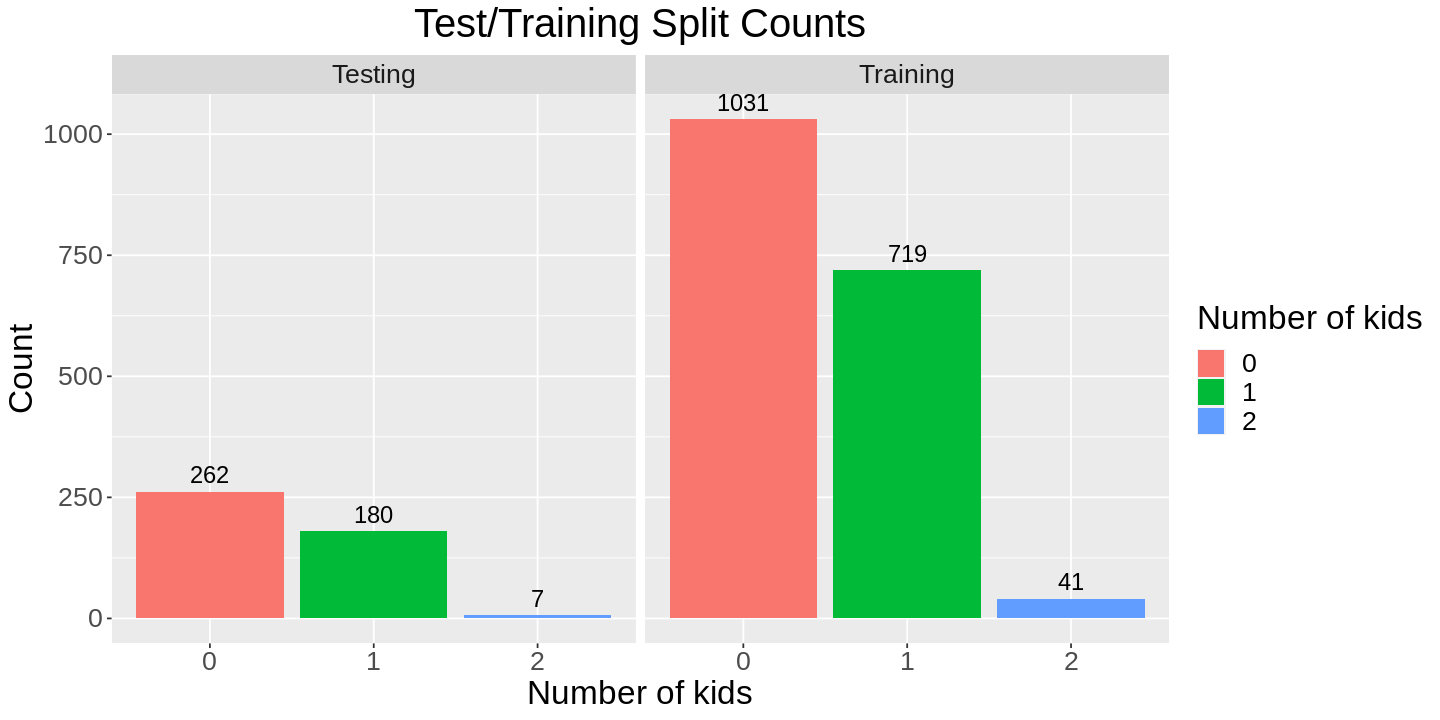

In [5]:
options(repr.plot.width = 12, repr.plot.height = 6)
training_bar_plot <- marketing_split_label |>
                        ggplot(aes(x = Kidhome, fill = Kidhome)) + 
                        geom_bar() +
                        labs(x = "Number of kids", 
                             y = "Count",
                             fill = "Number of kids") +
                        geom_text(stat='count', aes(label=..count..), vjust = -0.5, size=5) +
                        ggtitle("Test/Training Split Counts") +
                        theme(text = element_text(size=20),
                              plot.title = element_text(hjust = 0.5)) +
                              facet_wrap(~ is_training,
                                          labeller = labeller(is_training = c("TRUE" = "Training", "FALSE" = "Testing")))
training_bar_plot

### Cleaning the data

To remove all the unnecessary variables

In [6]:
marketing_clean <- marketing_train |>
                    select(Kidhome,Income,10:15)
head(marketing_clean)

Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,58138,635,88,546,172,88,88
0,71613,426,49,127,111,21,42
0,62513,520,42,98,0,42,14
0,55635,235,65,164,50,49,27
0,7500,6,16,11,11,1,16
0,63033,194,61,480,225,112,30


### Summarizing the data

To show the mean values for the different education level from the unscaled data

In [7]:
marketing_summary <- marketing_clean |>
                    group_by(Kidhome) |>
                    summarize(mean_Income = mean(Income, na.rm = TRUE),
                              mean_Wines =  mean(MntWines, na.rm = TRUE),
                              mean_fruits = mean(MntFruits, na.rm = TRUE),
                              mean_meat  = mean(MntMeatProducts, na.rm = TRUE),
                              mean_fish = mean(MntFishProducts, na.rm = TRUE),
                              mean_sweet = mean(MntSweetProducts, na.rm = TRUE),
                              mean_gold = mean(MntGoldProds, na.rm = TRUE))
marketing_summary

Kidhome,mean_Income,mean_Wines,mean_fruits,mean_meat,mean_fish,mean_sweet,mean_gold
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,61697.14,446.3472,39.625606,251.83123,55.356935,41.292919,59.83220
1,38240.82,103.2434,8.553547,48.57024,11.885953,8.872045,22.08623
2,39050.31,68.5122,7.317073,32.51220,8.268293,5.024390,13.73171


### Scaling the data

Standardizing the data to fit the scale better.

In [8]:
marketing_scaled <- marketing_clean |>
                    mutate(across(2:8, scale))
head(marketing_scaled)

Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0,0.2972653,1.0057834,1.5402186,1.70415547,2.5293381,1.4613316,0.8590483
0,0.9306227,0.3783731,0.5648893,-0.17100701,1.3879107,-0.1555924,-0.0314315
0,0.5029008,0.6605576,0.3898301,-0.30079153,-0.6891128,0.3512047,-0.5734627
0,0.1796183,-0.1950019,0.9650244,-0.00541987,0.2464834,0.5201370,-0.3218053
0,-2.0828425,-0.8824515,-0.2603894,-0.69014507,-0.4832817,-0.6382563,-0.5347462
0,0.5273421,-0.3180824,0.8649906,1.40878382,3.5210701,2.0405282,-0.2637306


# Visualization:

Visualizing all the possible variables for y-axis 

Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”


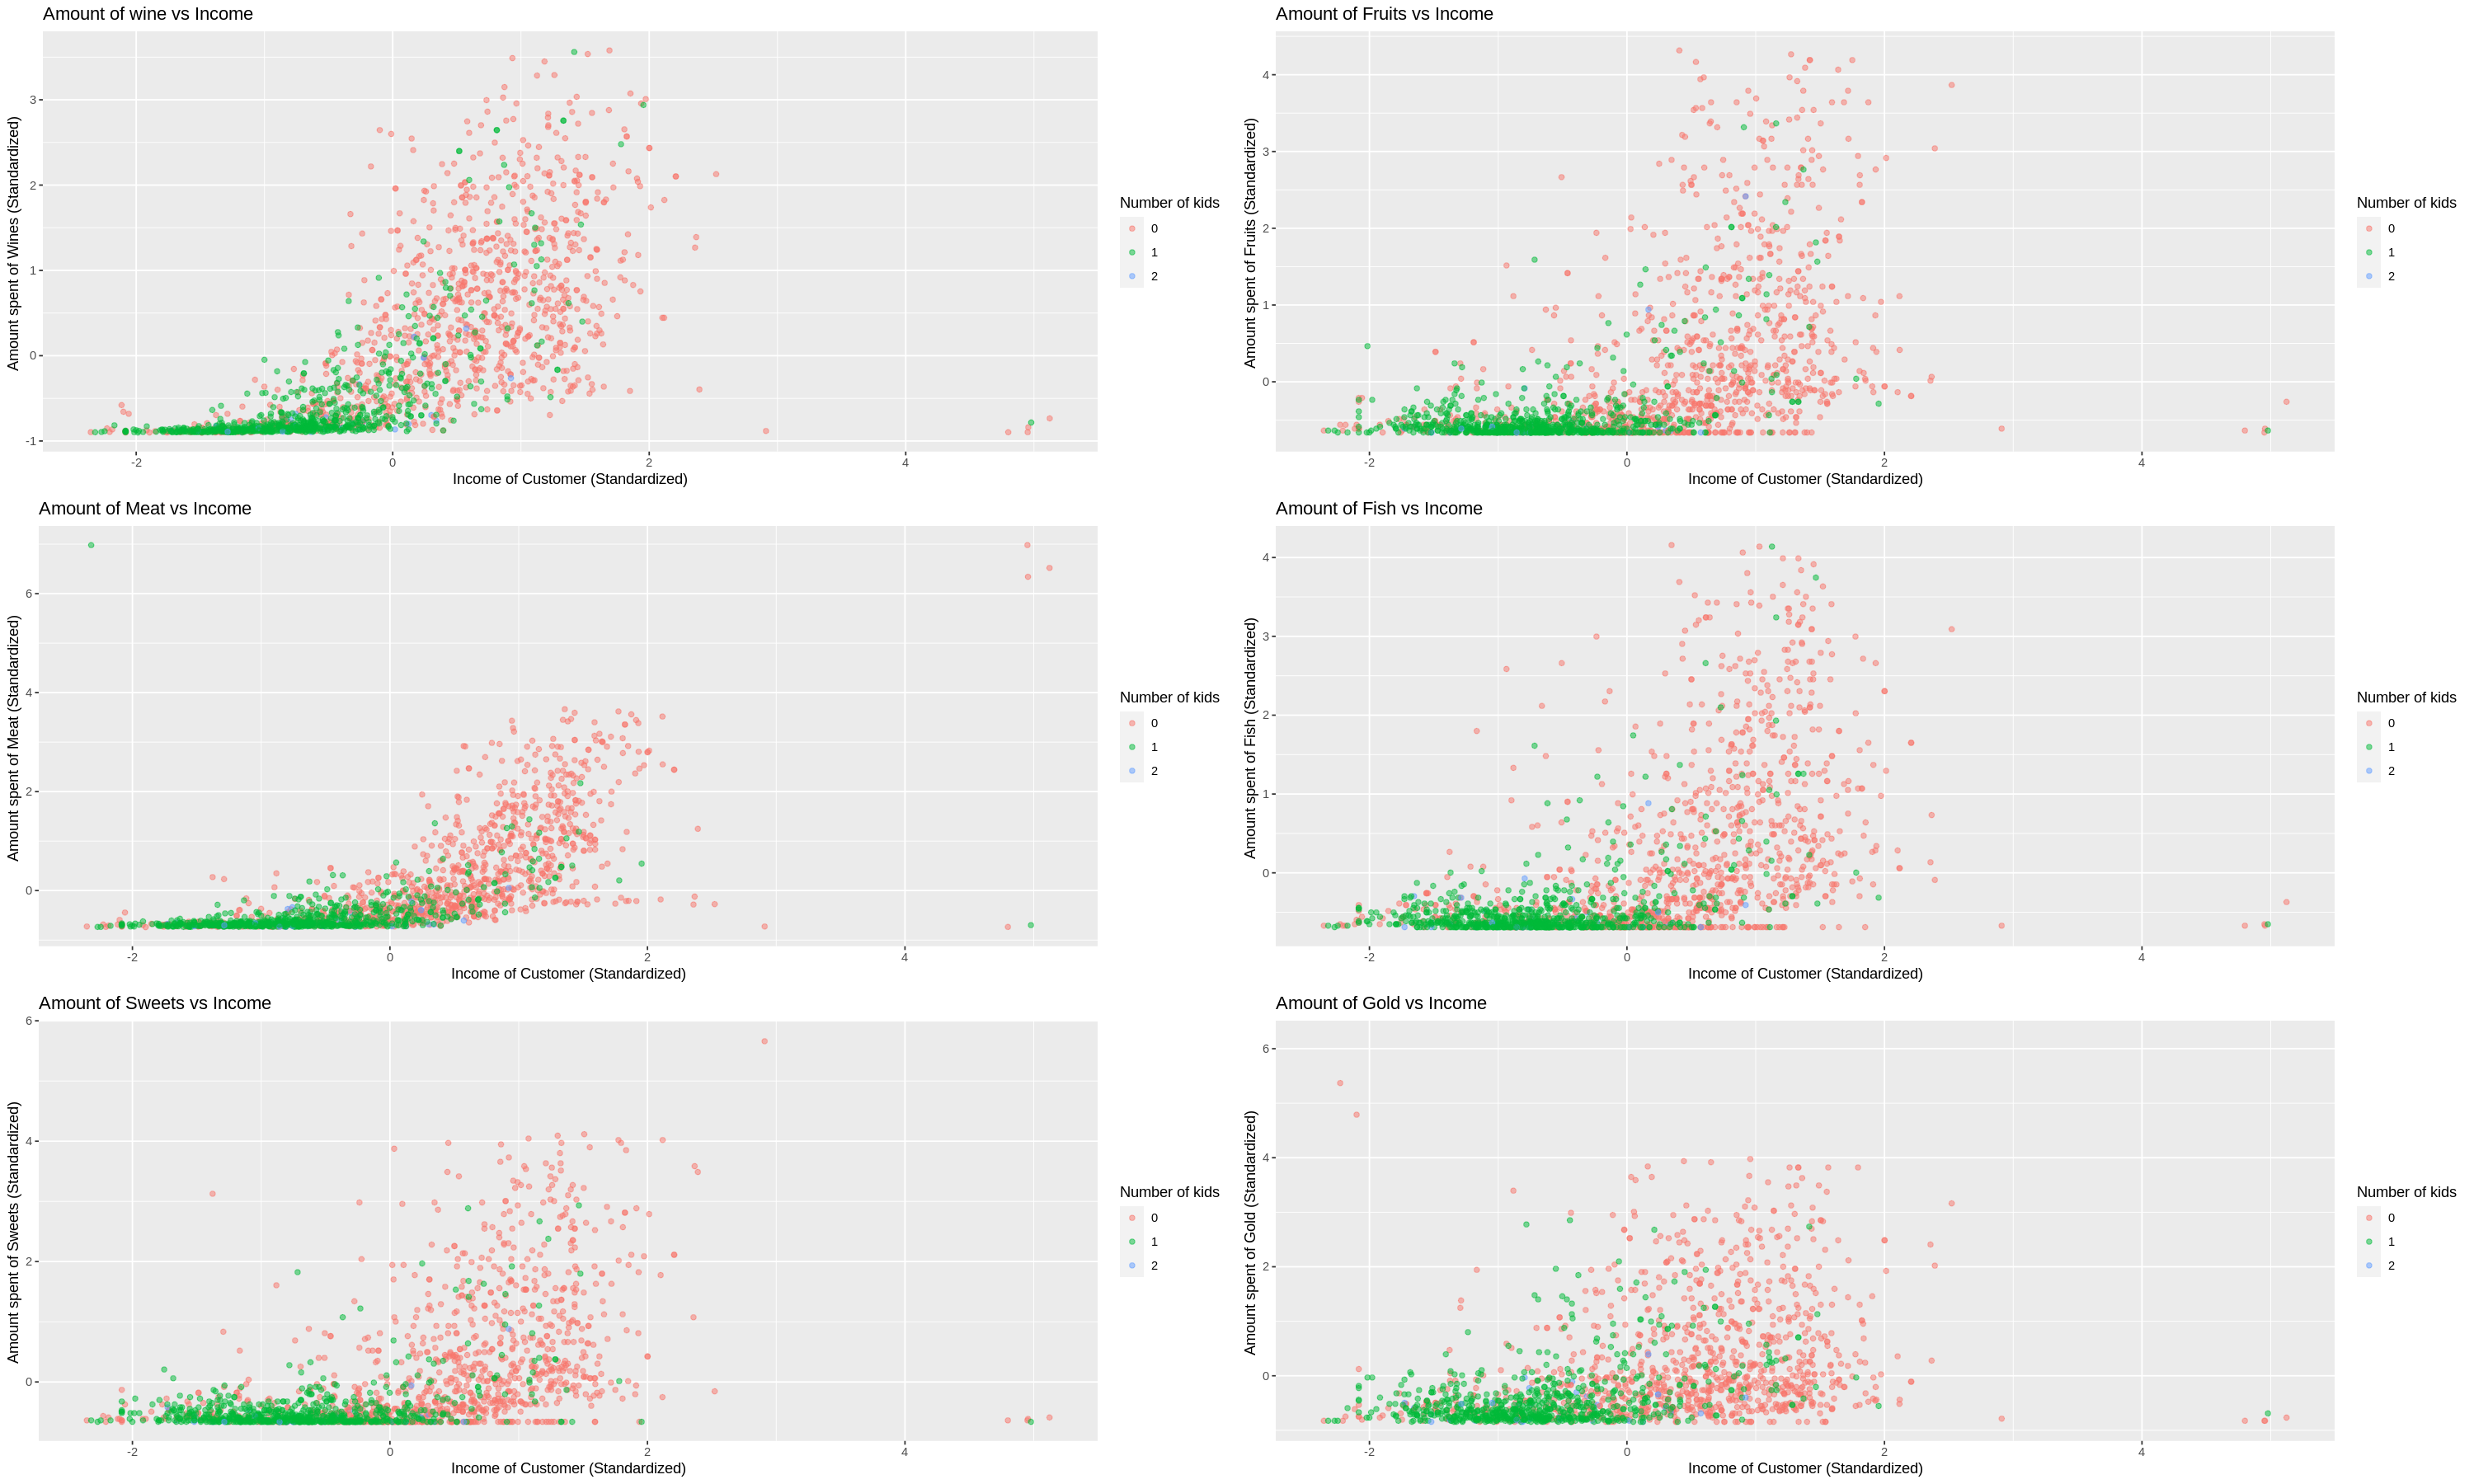

In [9]:
options(repr.plot.height = 15, repr.plot.width = 25)

marketing_wine <- ggplot (marketing_scaled, aes(x = MntWines , y = Income, color = Kidhome)) +
                    geom_point(alpha = 0.5) +
                    xlab("Amount spent of Wines (Standardized) ") +
                    ylab("Income of Customer (Standardized)") +
                    ggtitle("Amount of wine vs Income") +
                    labs(color = "Number of kids") +
                    coord_flip()

marketing_fruit <- ggplot (marketing_scaled, aes(x = MntFruits , y = Income, color = Kidhome)) +
                    geom_point(alpha = 0.5) +
                    xlab("Amount spent of Fruits (Standardized) ") +
                    ylab("Income of Customer (Standardized)") +
                    ggtitle("Amount of Fruits vs Income") +
                    labs(color = "Number of kids")+
                    coord_flip()

marketing_meat <- ggplot (marketing_scaled, aes(x = MntMeatProducts , y = Income, color = Kidhome)) +
                    geom_point(alpha = 0.5) +
                    xlab("Amount spent of Meat (Standardized) ") +
                    ylab("Income of Customer (Standardized)") +
                    ggtitle("Amount of Meat vs Income") +
                    labs(color = "Number of kids")+
                    coord_flip()

marketing_fish <- ggplot (marketing_scaled, aes(x = MntFishProducts , y = Income, color = Kidhome)) +
                    geom_point(alpha = 0.5) +
                    xlab("Amount spent of Fish (Standardized) ") +
                    ylab("Income of Customer (Standardized)") +
                    ggtitle("Amount of Fish vs Income") +
                    labs(color = "Number of kids")+
                    coord_flip()

marketing_sweet <- ggplot (marketing_scaled, aes(x = MntSweetProducts , y = Income, color = Kidhome)) +
                    geom_point(alpha = 0.5) +
                    xlab("Amount spent of Sweets (Standardized) ") +
                    ylab("Income of Customer (Standardized)") +
                    ggtitle("Amount of Sweets vs Income") +
                    labs(color = "Number of kids")+
                    coord_flip()

marketing_gold <- ggplot (marketing_scaled, aes(x = MntGoldProds , y = Income, color = Kidhome)) +
                    geom_point(alpha = 0.5) +
                    xlab("Amount spent of Gold (Standardized) ") +
                    ylab("Income of Customer (Standardized)") +
                    ggtitle("Amount of Gold vs Income") +
                    labs(color = "Number of kids")+
                    coord_flip()

plot_grid <- plot_grid (marketing_wine, marketing_fruit, marketing_meat, 
                       marketing_fish, marketing_sweet, marketing_gold, ncol=2)  
plot_grid

# Methods

This is a classification problem, and for that, a KNN model can be used for our predictions which can be tuned using the v-fold cross-validation methods we learned in worksheet 7.

This model can be used to predict the number of kids in a houshold from the 2240  enteries. 
80% of our data will be used for training split, since this would help in making our model more accurate and better suited for our needs.

We will use only the amount of fish purchased and amount of meat product purchased by the houshold to preduct the number of kids in a houshold.

We removed some unused variables because a clear pattern would be hard to identify, and may not be relevant to a company such as a food and beverage company trying to predict the spending habits of a household. However plots for them are shown above.

All this data can be visualized very easily by the use of ggplot library and using scatter plots simmilar to the ones above.

# Expected Outcomes and Significance

## What do you expect to find?

From our initial observation, it can be inferred that houses having a lower income and lower amount spent on fish and meat products are more likely to have one child wheread households having higher amount spent on fish and meat product are more likely to have no children irrespective of their income. 
houses with 2 children are spread almost evenly on these plots and it can be difficult to find a clear relationship due to their limited sample size.

## Impact of Findings

Proper demographics of the target audience would be really helpful to a company to predict the success of an advertisement campaign and knowing the number of kids in a household of its customers would help in identifying changes required in the product and marketing strategies to better suit their consumers.

## Future Questions

It will be interesting to study how the demographics change if we add more rows with two kids and it will be hard to determine if its this correlation can be a causation of a separate phenomenon. 